## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 讀取資料集
wine = datasets.load_wine()

In [3]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

def evalModel(model):
    # 訓練模型
    model.fit(x_train, y_train)

    # 預測測試集
    y_pred = model.predict(x_test)
    
    # 預測值與實際值的差距，使用 MSE
    print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

In [4]:
# 建立預設模型
dtr1 = DecisionTreeRegressor()
evalModel(dtr1)

Mean squared error: 0.00


In [5]:
#建立模型調參數
new_clf = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=5, max_depth=4)
evalModel(new_clf)

Mean squared error: 0.13


#### Wine test size=0.25

In [6]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(wine.feature_names)

Acuuracy:  0.9111111111111111
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.03076567 0.         0.         0.         0.08158611
 0.         0.         0.         0.38107601 0.0184594  0.08582143
 0.38865   ]


#### Wine :criterion = 'gini',max_depth = None,min_samples_split = 2,min_samples_leaf = 1

In [9]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = None,min_samples_split = 2,min_samples_leaf = 1,)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [10]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(wine.feature_names)

Acuuracy:  0.8666666666666667
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.         0.         0.         0.04405085 0.
 0.08158611 0.         0.         0.36779083 0.         0.08582143
 0.4071094 ]


#### wine criterion = 'gini',max_depth = None,min_samples_split = 4,min_samples_leaf = 2

In [12]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = None,min_samples_split = 4,min_samples_leaf = 2,)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [13]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [14]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [15]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.0138006  0.         0.         0.         0.         0.04346734
 0.08954144 0.         0.         0.41664861 0.         0.04335578
 0.39318623]


### wine 回歸

In [16]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [17]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(wine.feature_names)

Acuuracy:  0.9777777777777777
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [18]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.00985672 0.         0.         0.00299987 0.         0.
 0.61367513 0.         0.         0.1214791  0.         0.
 0.25198917]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

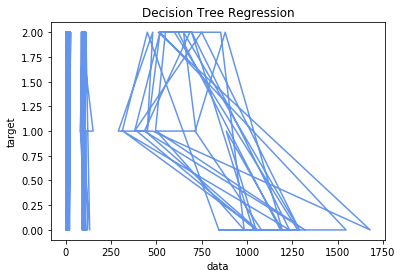

In [24]:
#預測結果
#np.arrange(起始點, 結束點, 間隔)：np.arange(0.0, 5.0, 0.01)在0~5之間每0.01取一格，建立預測輸入點矩陣。
#np.newaxis：增加矩陣維度。
#predict(輸入矩陣)：對訓練完畢的模型測試，輸出為預測結果。

plt.figure()
#plt.scatter(x_train, y_train, c="darkorange", label="data")
plt.plot(x_test, y_pred, color="cornflowerblue")  ## label="max_depth=2", linewidth=2
plt.xlabel("data") #x軸代表data數值
plt.ylabel("target") #y軸代表target數值
plt.title("Decision Tree Regression") #標示圖片的標題
#plt.legend() #繪出圖例
plt.show()

In [27]:
type(wine)

sklearn.utils.Bunch